<h1>STOR601 Assignment - C++ for Python Programmers

<h2> Part 1.

In [5]:
#include <iostream>
#include <fstream>
#include <sstream>
#include <string>
#include <list>
#include <vector>
#include<cmath>

In [2]:
struct Point
{
    double x;
    double y;
    Point(double _x = 0.0, double _y = 0.0)
    {
        x = _x;
        y = _y;   
    }
    Point operator-(Point p)
    {
       return Point(x - p.x,y - p.y);
    }
};

struct Line_Segment
{
    Point a;
    Point b;
    Line_Segment(Point _a, Point _b)
    {
        a = _a;
        b = _b;
    }
    double anon(Line_Segment other)
    {
        Point c = b - a;
        Point d = other.b - other.a;
        return c.x * d.y - d.x*c.y;
    }
    double edist() // I have added this function to be used in the Jarvis March Implementation
    {
        double cx = pow(a.x-b.x,2);
        double cy = pow(a.y-b.y,2);
        return pow(cx+cy,0.5);
    }
};

###### An explanation for what the anon function does. 

The anon algorithm takes two line segments in 2 dimensions. These line segments can be thought of as 2 dimensional vectors (P and Q) with a start and an end point. 

Given these two 2 dimensional vectors (in components i and j), extend them to 3 dimensional vectors (with k component = 0). 

Then take the cross product of these two 3 dimensional vectors. 

The value of this cross product will be (0,0,x).

This value x is the output of anon.

The absolute value of x is also the area of the parallelogram PQ(-P)(-Q). 

Below is an illustration of this area: 

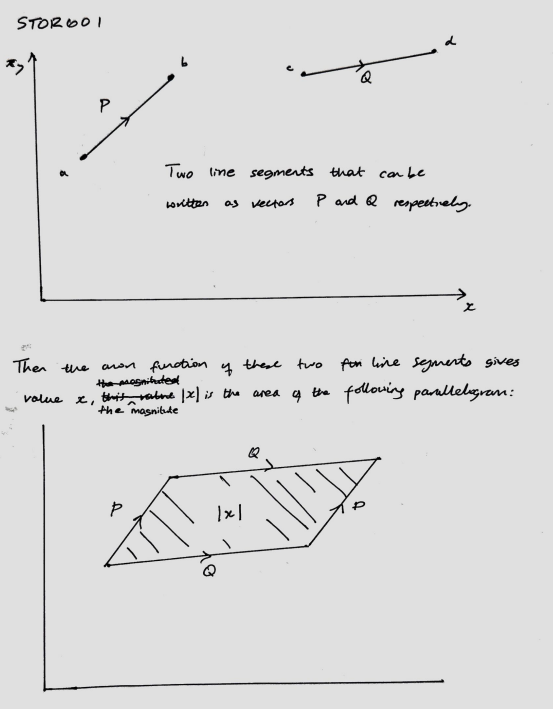

As shown below, if this x value is positive then placing the vector Q after the vector P causes a right turn and if this x value is negative then placing the vector Q after the vector P results in a left turn. If the value x is 0 then the two vectors are parallel (and hence the line segments are parallel too). In the last assessment (and this assessment) we will use this method of taking the cross product to help us implement the Jarvis March algorithm.

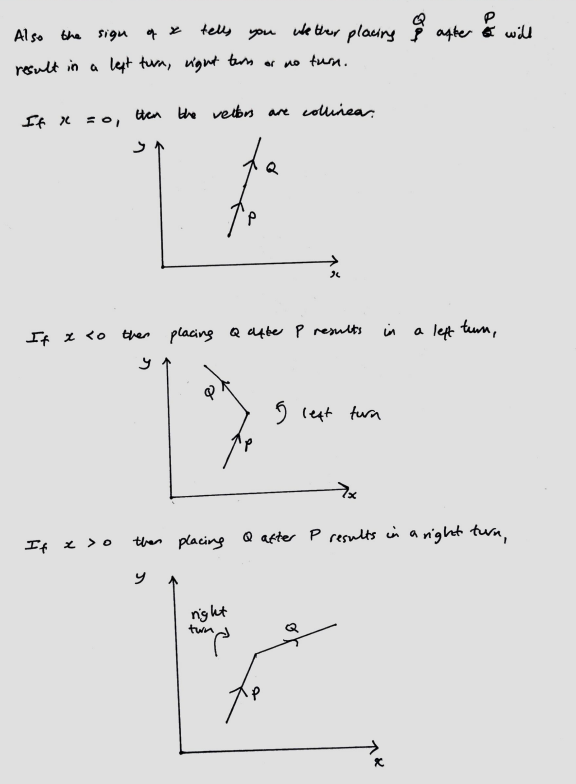

<h2> Part 2.

Pseudocode for determining whether two line segments intersect, the general plan area is a brief pseudocode and if more detail is required then the user can view the rest. 

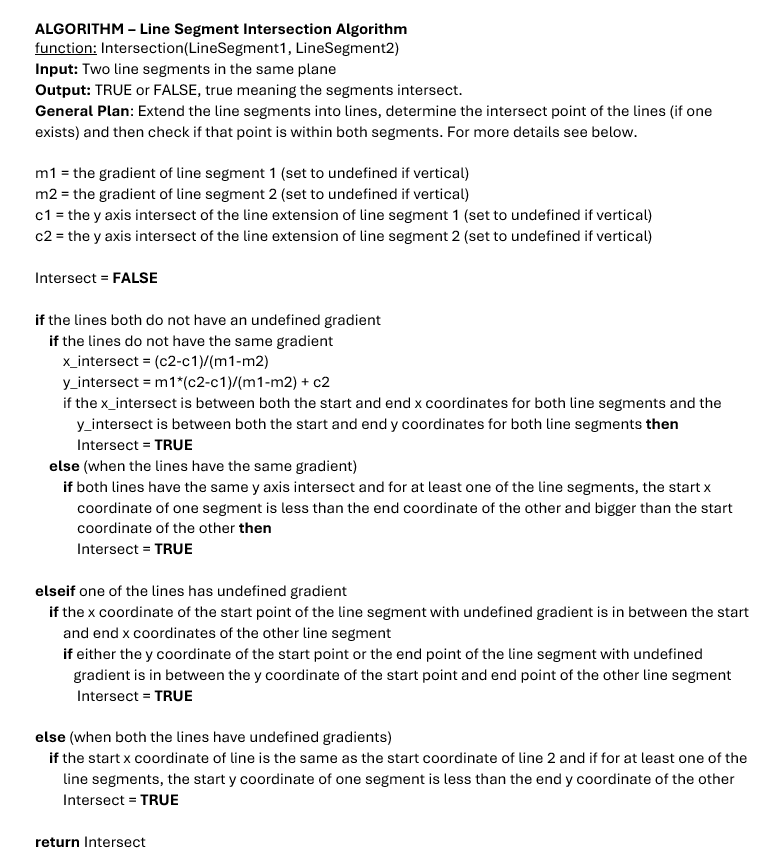

<h2> Part 3.

Implementation of the Jarvis March algorithm in C++.

This implementation of the Jarvis March algorithm is based off my previous Python implementation in the previous STOR601 Python assessment, which was inspired by https://algorithmtutor.com/Computational-Geometry/Convex-Hull-Algorithms-Jarvis-s-March/. 

The idea to print the points at the end of the function was given by: https://www.geeksforgeeks.org/convex-hull-using-jarvis-algorithm-or-wrapping/.

In [6]:
vector<string> fn() {

return {"bread", "meat", "rice", "tomato sauce", "Cheese"};

}

input_line_8:2:2: error: no template named 'vector'; did you mean 'std::vector'?
 vector<string> fn() {
 ^~~~~~
 std::vector
/../lib/gcc/x86_64-linux-gnu/11/../../../../include/c++/11/bits/stl_vector.h:389:11: note: 'std::vector' declared here
    class vector : protected _Vector_base<_Tp, _Alloc>
          ^
input_line_8:2:9: error: unknown type name 'string'; did you mean 'std::string'?
 vector<string> fn() {
        ^~~~~~
        std::string
/../lib/gcc/x86_64-linux-gnu/11/../../../../include/c++/11/bits/stringfwd.h:79:33: note: 'std::string' declared here
  typedef basic_string<char>    string;   
                                ^
input_line_8:2:22: error: function definition is not allowed here
 vector<string> fn() {
                     ^


ename: evalue

In [3]:
void JarvisMarch(std::vector<Point> data) 
{
    // the data has length n = data.size()
 
    // next we find the leftmost point in the data (smallest x coordinate) using a for loop
    // we also make sure that this is the leftmost point with the smallest y coordinate to ensure that the algorithm
    // will be consistent with regard to collinearity. If 3 or more points on the hull would be collinear, we only
    // want to choose the first and the last in the line. Choosing the starting point to be the point with the smallest
    // y coordinate among the points with all the smallest x coordinates ensures this will occur with regard to the 
    // first point. 
    
    int start_index {0};
    
    for(int i = 0; i < data.size(); i++)
    {
            if(data[i].x == data[start_index].x)
            {
                if(data[i].y < data[start_index].y)
                {
                    start_index = i;
                }
            }
            else if (data[i].x < data[start_index].x)
            {
                start_index = i;
            }
    }
    
    // pick a candidate point to move to
    
    int candidate_index;
    
    if(start_index == data.size()-1) // if the start point of the hull found is the final data point, set the new candidate point to be the first data point
    {
        candidate_index = 0;
    }
    else
    {
        candidate_index = data.size()-1;
    }
    
    for(int i = 0; i < data.size(); i++)
    {
        if(i != start_index) // this ensures that we do not try to consider adding again the start index into the convex hull
        {
            Line_Segment u {data[start_index],data[candidate_index]}; // creates a line segment from the start convex hull point to the candidate point
            Line_Segment v {data[start_index],data[i]}; // creates a line segment from the start convex hull point to a new possible point
            double distanceValue1;
            distanceValue1 = u.edist();
            double distanceValue2;
            distanceValue2 = v.edist();
            
            if(u.anon(v) == 0) // if the points are collinear
            {
                if(distanceValue1 < distanceValue2) // and if the point i is further from the start point than the candidate point
                {
                    candidate_index = i; // changes the candidate point to the new point found furthest to the right which is also collinear to the previous candidate point
                }
            }
            
            if(u.anon(v) < 0) 
            {
                candidate_index = i; // changes the candidate point to the new point found furthest to the right
            }
            
            
        }
    }
    
    std::vector<Point> convex_hull {data[start_index]}; // this will be a list containing the points of the convex hull in the output
    // we will append to this list as we find a new point in the hull
    
    int recent_index {candidate_index};
    
    while(recent_index != start_index)
    {
        // append the most recent point found on the hull to the hull list
        // we do this at the start of the while loop (and not the end) to ensure the start index is not added
        convex_hull.push_back(data[recent_index]);
        
        // pick a new candidate point (different from the most recent point found on the hull)
        if (recent_index == data.size()-1) // if the recent point of the hull found is the final data point, set the new candidate point to be the first data point
        {
            candidate_index = 0;
        }
        else
        {
            candidate_index = data.size()-1;
        }
        
        
        for(int i = 0; i < data.size(); i++)
        {
            if(i != recent_index) // this ensures that we do not try to consider adding again the start index into the convex hull
            {
                Line_Segment u {data[recent_index],data[candidate_index]}; // creates a line segment from the recent convex hull point to the candidate point
                Line_Segment v {data[recent_index],data[i]}; // creates a line segment from the recent convex hull point to a new possible point
                double distanceValue1;
                distanceValue1 = u.edist();
                double distanceValue2;
                distanceValue2 = v.edist();
            
                if(u.anon(v) == 0) // if the points are collinear
                {
                    if(distanceValue1 < distanceValue2) // and if the point i is further from the start point than the candidate point
                    {
                        candidate_index = i; // changes the candidate point to the new point found furthest to the right which is also collinear to the previous candidate point
                    }
                }
            
                if(u.anon(v) < 0) 
                {
                    candidate_index = i; // changes the candidate point to the new point found furthest to the right
                }
            }
        }
        
        recent_index = candidate_index; // the new recent point of the next iteration of the while loop is the most recent point of the convex hull that has been found             
    }
    
    std::cout << "The following points are the convex hull:" << std::endl;
    for(int i = 0; i < convex_hull.size(); i++)
    {
        std::cout << "(" << convex_hull[i].x << "," << convex_hull[i].y << ")" << std::endl;
    }
}

Review of this implementation with regards to the 5 Rs, in comparison to the Python counterpart. 

Repeatable: Successive runs of the program will produce the same output, so this implementation in C++ is repeatable, and is just as repeatable as the implementation in Python. 

Rerunnable: This C++ implementation can be rerun. In fact, it is easier to rerun than the Python implementation because the C++ implementation should run faster than the Python implementation. 

Reproducible: If other researchers were given this code and data, they would be able to reproduce the results. It may be ever so slightly more difficult than with Python, simply because C++ is more complicated to use than Python. 

Reusable: This code is not as easy to modify or edit in comparison to the Python implementation, again due to C++ being more difficult to work with than Python. Also, Python syntax is easier to understand than the C++ syntax, which makes the Python implementation easier to edit and reuse. 

Replicable: Given this code or pseudocode describing the algorithm, it is harder to reproduce than the Python implementation. This is because C++ is more complicated to understand and the syntax is less user friendly. For example, in Python where it would say pinrt("Message") to print Message, in C++ we have to use std::cout << "Message" << std::endl;, which is much less easy to understand. Due to this less friendly user experience, the Python code would be easier to replicate than the C++ counterpart. However, the C++ code is still replicable. 

<h2> Part 4.

The following is pseudocode will find the pair of points that are furthest apart in a set of points, solving the problem using a Brute Force method. 

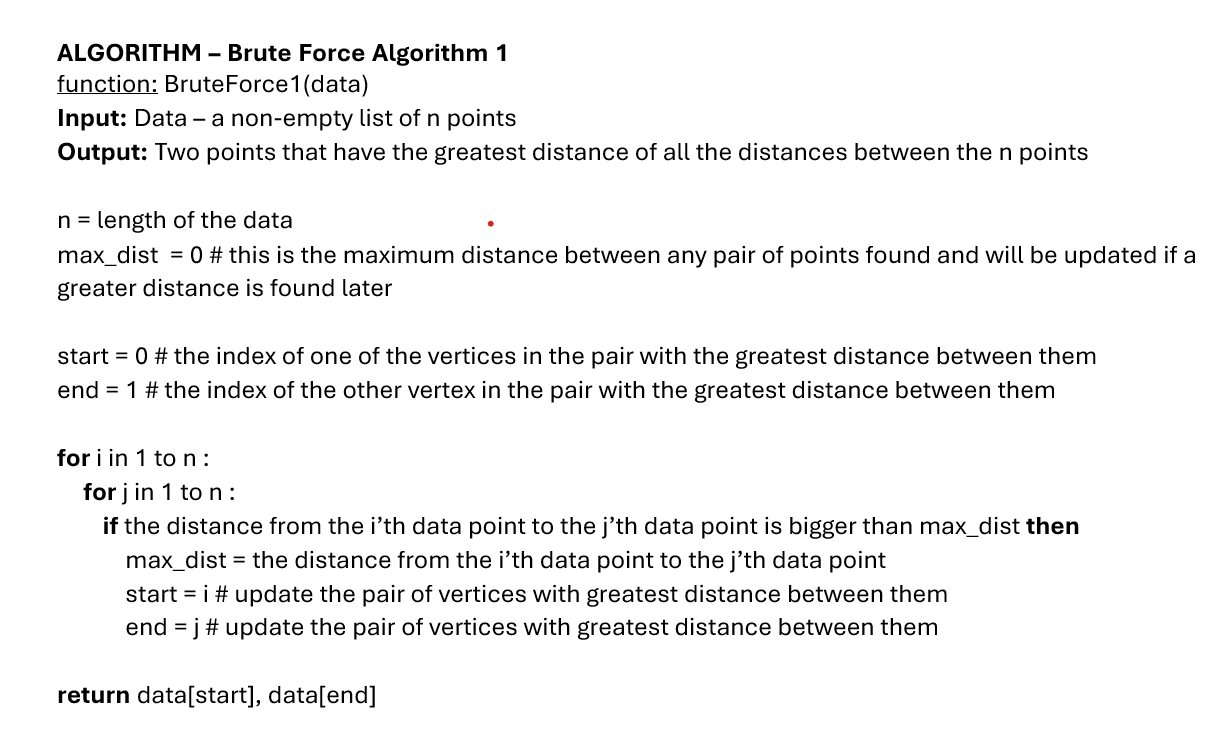

The above pseudocode can be improved, upon slightly. The previous pseudocode would consider the same pair of points twice, whereas the following pseudocode will only consider each possible pair of points once:

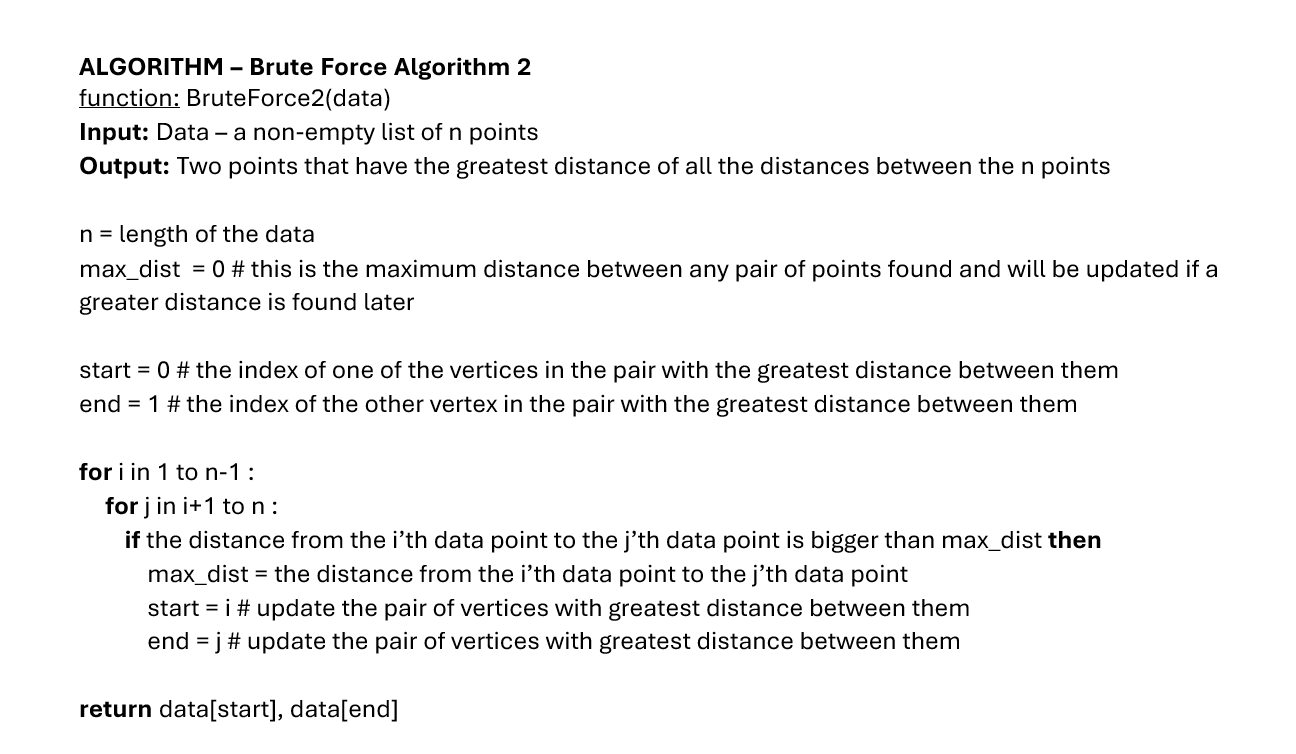

<h2> Part 5.

We will implement the first Brute Force algorithm from Part 4. 

In [4]:
void maximumdist(std::list<std::vector<double>> listvec) // the function takes a list of vectors of doubles (at least 2 vectors)
{
    double max_dist {0}; // initialise the maximum distance to 0
    std::vector<double> point1; // the first point in the pair of maximal distance (this will be updated)
    std::vector<double> point2; // the second point in the pair of maximal distance (this will be updated)
    double x0;
    double y0;
    double x1;
    double y1;
    double changeXsqrd;
    double changeYsqrd;
    double dist_xy;
    for(std::vector<double> x : listvec)
    {
        for(std::vector<double> y : listvec)
        {
               x0 = x[0];
               y0 = x[1];
               x1 = y[0];
               y1 = y[1];
               changeXsqrd = pow(x0-x1,2);
               changeYsqrd = pow(y0-y1,2);
               dist_xy = pow(changeXsqrd+changeYsqrd,0.5);
               if(dist_xy >= max_dist)
               {
                   point1 = x;
                   point2 = y;
                   max_dist = dist_xy;
               }
        }    
    }
    std::cout << "{(" << point1[0] << "," << point1[1] << "),(" << point2[0] << "," << point2[1] << ")}" << std::endl;
}

This implementation can be improved with regards to complexity in the best case. 

It is clear that the pair of points that are furthest apart will always lie in the convex hull of the data set. 

So first doing the Jarvis March Algorithm followed by this method above on the convex hull data set will also find the pair of points that are furthest apart. This method has computational complexity $\mathcal{O}(nh+h^{2})$ (the $nh$ coming from the Jarivs March step and the $h^{2}$ coming from the brute force step), where $h$ is the size of the convex hull. In the best case, where the convex hull is small and not trivial (i.e. $h=3$), this is much faster than simply running the brute force method. However, if the size of the convex hull is close to the size of the original data set, this algorithm will be much slower (about twice as slow) as just doing the brute force method. 

Pseudocode for this algorithm which is an improvement in the best case can be found below: 

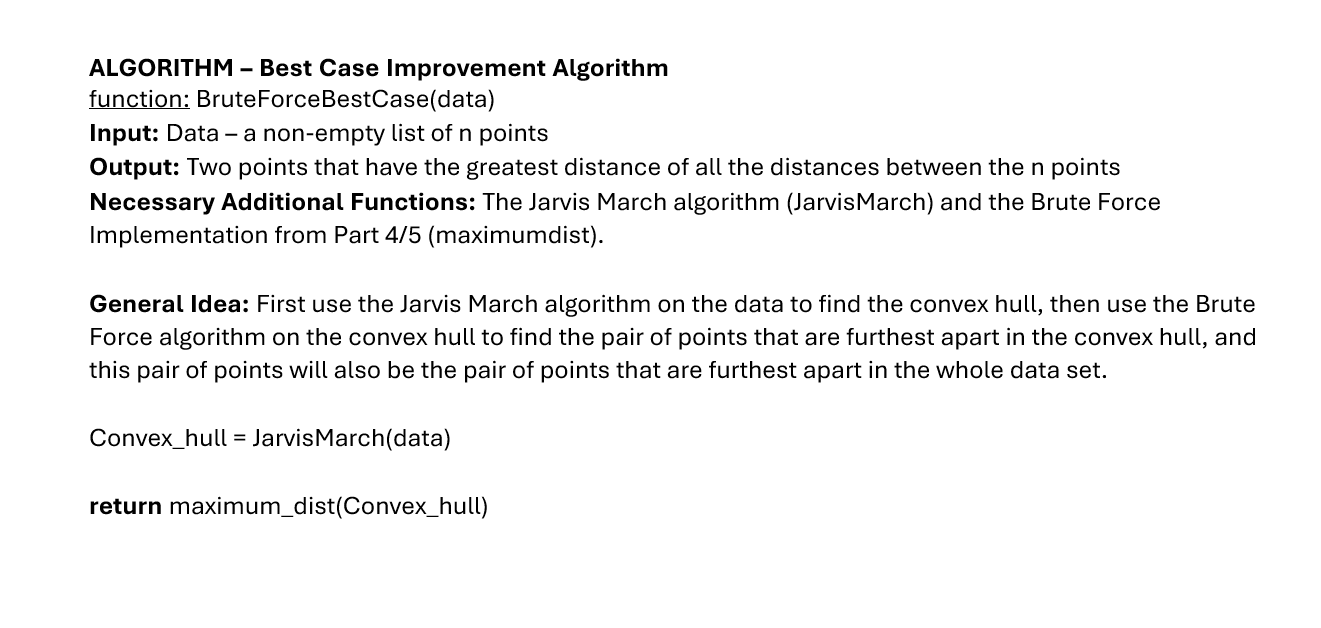

##### Please Ignore the following code, it was just for testing purposes:

In [5]:
#include <fstream>
#include <sstream>
#include <string>

template <typename T>
T lexical_cast(const std::string& str)
{
    T var;
    std::istringstream iss;
    iss.str(str);
    iss >> var;
    // deal with any error bits that may have been set on the stream
    return var;
}

template<typename data_type,
template <typename... table_type_args> typename table_type,
template <typename... row_type_args> typename row_type>
table_type<row_type<data_type> > csvtable(const std::string& filename)
{
  table_type<row_type<data_type> > table;
  std::ifstream infile(filename);
  while(infile)
    {
      std::string s;
      if(!getline(infile,s)) break;
      std::istringstream ss(s);
      row_type<data_type> row;
      while(ss)
      {
         std::string s;
         if(!getline(ss,s,',')) break;
         row.push_back(lexical_cast<data_type>(s)); 
      }
      table.push_back(row);
    }
  return table;
}

#include <list>
#include <vector>

#define readcsv csvtable<double,std::list,std::vector>

In [6]:
std::string filename {"square.csv"};
  std::list<std::vector<double> > xy_pairs {readcsv(filename)};


In [7]:
maximumdist(xy_pairs)

{(1.5,2.5),(2,1)}


(void) @0x7f50b37fcd00


In [8]:
Point g {1,1};
Point h {2,1};
Point c {3,2};
Point d {2,2};
Point e {2,1.5};
Point f {2.5,2.5};
std::vector<Point> vectest {g,h,c,d,e,f}

In [9]:
JarvisMarch(vectest)

The following points are the convex hull:
(1,1)
(2,1)
(3,2)
(2.5,2.5)


(void) @0x7f50b37fcd00
